## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- Python modules (non-DL)
- pytorch indexable tensor, and tensor creation (including RNGs)
- fastai.datasets

## Check imports

In [191]:
def pp(*args):
    '''
    print arguments in newlines
    ----
    Input: *args
    return: 
    '''
    for arg in args: print(arg, '\n')

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [44]:
#export
from exp.nb_00 import *
import operator

def test(a,b, cmp, cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"
    
def test_eq(a,b): test(a,b,operator.eq,'==')

In [45]:
test_eq(TEST, 'test')

In [4]:
# To run tests in console:
# ! python run_notebook.py 01_matmul.ipynb

## Get data

In [5]:
# export 
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [6]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/home/shubhajit/.fastai/data/mnist.pkl.gz')

In [7]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [8]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [9]:
assert x_train.shape[0]==y_train.shape[0]==50000
test_eq(x_train.shape[1], 28*28)
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 9)

In [10]:
mpl.rcParams['image.cmap'] = 'gray'

In [11]:
img = x_train[0]

In [12]:
img.view(28,28).type()

'torch.FloatTensor'

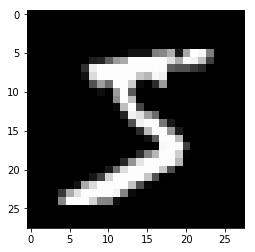

In [13]:
plt.imshow(img.view(28,28));

## Initial python model

In [14]:
weights = torch.randn(784, 10)/math.sqrt(784)

In [15]:
bias = torch.zeros(10)

#### Matrix multiplication

In [65]:
def matmul(a, b):
    ar, ac = a.shape # nrows*ncols
    br, bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

In [66]:
m1 = x_valid[:5]
m2 = weights

In [67]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [68]:
%time t1=matmul(m1,m2)

CPU times: user 857 ms, sys: 4 ms, total: 861 ms
Wall time: 860 ms


In [33]:
len(x_train)

50000

#### Elementwise ops

Operators (+,-,\*,/,>,<,==) are usually element-wise.

Examples of element-wise operations:

In [34]:
a = tensor([10.,6,-4])
b = tensor([2.,8,7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [35]:
a+b

tensor([12., 14.,  3.])

In [36]:
(a<b).float().mean()

tensor(0.6667)

In [37]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste.

In [38]:
(m*m).sum().sqrt()

tensor(16.8819)

#### Elementwise matmul

In [69]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = (a[i,:]*b[:,j]).sum()
    return c

In [77]:
%timeit -n 10 _ = matmul(m1, m2)

1.48 ms ± 85.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [71]:
%time _ = matmul(m1, m2)

CPU times: user 3.34 ms, sys: 0 ns, total: 3.34 ms
Wall time: 2.97 ms


In [76]:
857/3.34

256.5868263473054

In [53]:
# ans = matmul(m1, m2)
# ans

tensor([[-0.2684,  0.0261,  0.1940,  0.0455,  0.2854, -0.0265,  0.0160, -0.2260,
          0.3245, -0.2513],
        [-0.1717,  0.1694,  0.0470, -0.2650,  0.2842,  0.2406, -0.0347, -0.2645,
         -0.3713,  0.0081],
        [ 0.1992,  0.1596,  0.2468, -0.0194,  0.1269, -0.1175,  0.0769, -0.4318,
         -0.2886,  0.0767],
        [ 0.0230, -0.1285,  0.0369, -0.4181,  0.2603, -0.4040, -0.1733,  0.0101,
         -0.4844, -0.2663],
        [-0.0156, -0.0652, -0.0368,  0.5215,  0.3032, -0.5294, -0.0593, -0.2129,
         -0.2522, -0.1409]])

In [42]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [46]:
test_near(t1,matmul(m1, m2))

### Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

#### Broadcasting with a scalar

In [80]:
a

tensor([10.,  6., -4.])

In [82]:
a>0

tensor([1, 1, 0], dtype=torch.uint8)

How are we able to do a > 0?  0 is being **broadcast** to have the same dimensions as a.

Remember above when we normalized our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar)?  We were using broadcasting!

Other examples of broadcasting with a scalar:

In [83]:
a+1

tensor([11.,  7., -3.])

In [85]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [86]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

#### Broadcasting a vector to a matrix

We can also broadcast a vector to a matrix:

In [95]:
c = tensor([10., 20, 30]);c

tensor([10., 20., 30.])

In [97]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [98]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [99]:
m+c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [100]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [101]:
t = c.expand_as(m)

In [102]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [103]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [105]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [110]:
m.storage()

 1.0
 2.0
 3.0
 4.0
 5.0
 6.0
 7.0
 8.0
 9.0
[torch.FloatStorage of size 9]

In [108]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [119]:
c.shape, c.unsqueeze(0).shape, c, c.unsqueeze(0), c.unsqueeze(1)

(torch.Size([3]),
 torch.Size([1, 3]),
 tensor([10., 20., 30.]),
 tensor([[10., 20., 30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [193]:
pp(c.shape, c.unsqueeze(0).shape, c, c.unsqueeze(0), c.unsqueeze(1))

torch.Size([3]) 

torch.Size([1, 3]) 

tensor([10., 20., 30.]) 

tensor([[10., 20., 30.]]) 

tensor([[10.],
        [20.],
        [30.]]) 



In [121]:
c.shape, c.unsqueeze(0).shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [122]:
c.shape, c[None, :].shape, c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

You can always **skip trailling ':'s. And '...' means '*all preceding dimensions*'**

In [124]:
c[None].shape, c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [170]:
print(c, '\n', c[None, :],'\n', c[:,None], '\n', m)

tensor([10., 20., 30.]) 
 tensor([[10., 20., 30.]]) 
 tensor([[10.],
        [20.],
        [30.]]) 
 tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [159]:
print(c[:,None].expand_as(m),'\n', c[None, :].expand_as(m))

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]]) 
 tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])


In [166]:
m + c[:, None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [180]:
print(c[None], '\n',m ,'\n',  m + c[:, None])

tensor([[10., 20., 30.]]) 
 tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]) 
 tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])


In [192]:
pp(c[None], m, m+c[:,None])

tensor([[10., 20., 30.]]) 

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]) 

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]]) 



#### Broadcasting Rules

In [196]:
c[:, None] # vector

tensor([[10.],
        [20.],
        [30.]])

In [197]:
c[None, :]

tensor([[10., 20., 30.]])

In [198]:
c[None,:]*c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [202]:
pp(c[None] * c[:,None], c[:, None]*c[None])

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]]) 

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]]) 



In [203]:
c[None] > c[:, None]

tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)

When operating on two arrays, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

#### Matmul with broadcasting

In [207]:
pp(m, m[0,:].unsqueeze                 (-1))

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]) 

tensor([[1.],
        [2.],
        [3.]]) 



In [220]:
pp(m1[:,2], m2[2,:])

tensor([0., 0., 0., 0., 0.]) 

tensor([-0.0310, -0.0157,  0.0003, -0.0330,  0.0410,  0.0417, -0.0113,  0.0188,
         0.0840,  0.0290]) 



In [224]:
def matmul(a,b):
    '''
    matmul with broadcasting
    '''
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#         import pdb;pdb.set_trace()
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)


In [222]:
matmul(m1, m2)

> <ipython-input-221-268c262c39f1>(12)matmul()
-> c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)
(Pdb) a[i].unsqueeze(-1)
a = tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
b = tensor([[ 0.0315, -0.0384,  0.0344,  ...,  0.0067, -0.0006,  0.0304],
        [-0.0060, -0.0426,  0.0097,  ...,  0.0067,  0.0503,  0.0671],
        [-0.0310, -0.0157,  0.0003,  ...,  0.0188,  0.0840,  0.0290],
        ...,
        [-0.0033, -0.0893, -0.0654,  ...,  0.0592,  0.0463, -0.0338],
        [-0.0033,  0.0417, -0.0354,  ...,  0.0038, -0.0044, -0.0473],
        [-0.0601,  0.0174, -0.0662,  ..., -0.0043, -0.0061, -0.0217]])
(Pdb) b
(Pdb) (a[i].unsqueeze(-1) * b).sum(dim=0)
tensor([-0.2684,  0.0261,  0.1940,  0.0455,  0.2854, -0.0265,  0.0160, -0.2260,
         0.3245, -0.2513])
(Pdb) c
> <ipython-input-221-268c262c39f1>(10)matmul()
-> import pdb;pdb.set_trace

(Pdb) q


BdbQuit: 

In [225]:
%time _ = matmul(m1, m2)

CPU times: user 861 µs, sys: 64 µs, total: 925 µs
Wall time: 576 µs


In [228]:
857000 / 576 # times faster than the first for loop inmplementation     

1487.8472222222222

### Einstein summation

Einstein summation (`einsum`) is a compact representation for combining products and sums in a general way. From the numpy docs:

"The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so `np.einsum('i,i', a, b)` is equivalent to `np.inner(a,b)`. If a label appears only once, it is not summed, so `np.einsum('i', a)` produces a view of a with no changes."

In [249]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [250]:
%time _ = matmul(m1, m2)

CPU times: user 160 µs, sys: 13 µs, total: 173 µs
Wall time: 178 µs


In [251]:
857000 / 173 # times faster than the first for loop inmplementation

4953.757225433526

### pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

In [256]:
%time t2 = m1.matmul(m2)

CPU times: user 99 µs, sys: 8 µs, total: 107 µs
Wall time: 113 µs


In [257]:
857000 / 107 # times faster than the first for loop inmplementation

8009.345794392523

In [258]:
t2 = m1@m2

In [260]:
test_near(t1, t2)

## Export

In [261]:
!./notebook2script.py 01_matmul-Copy1.ipynb

Converted 01_matmul-Copy1.ipynb to nb_01.py


In [ ]:
# %load notebook2script.py

In [267]:
# %load exp/nb_01.py